# Convolutational Neural Network for Visual Recognition 
A neural network made to learn more about Neural Network from http://cs231n.github.io/neural-networks-case-study/

We will undergo a complete implementation of a toy Neural Network in 2 dimentions. We'll first implement a simple linear classifier and then extend the code to a 2-layer Neural Network. 

## Importing requried libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

## Generating some data
Let's generate a classification set not linearly separable. We'll be generating a spiral dataset.

Text(0.5,1,'Spiral Data set')

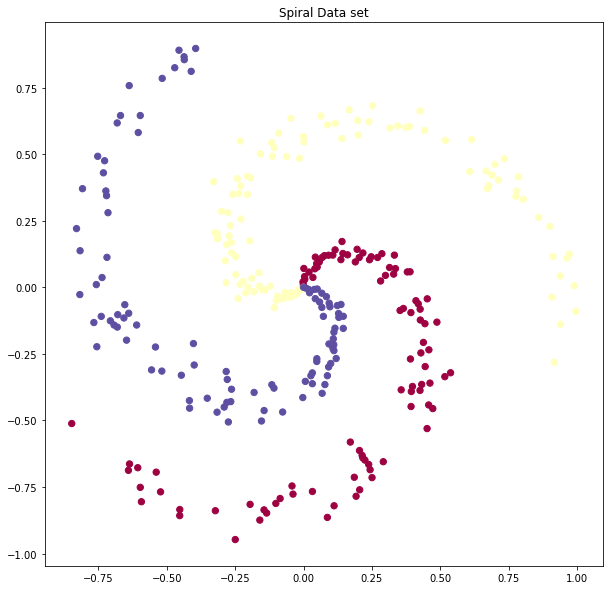

In [42]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype ='int') # Class labels
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# Data visualization
plt.scatter(X[:,0], X[:,1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.title('Spiral Data set')

## Training a softmax Linear Classifier

In [26]:
# Train a linear Classifier

# Initialize parameters randomly
W = np.random.randn(D, K)*0.01
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3

# Gradient Descent loop
num_examples = X.shape[0]
for i in range(200):
    
    #Evaluate class scores
    scores = np.dot(X, W) + b
    
    # Compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) # [N x K]
    
    # Compute the loss: average entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print('Iteration {}: loss {}'.format(i, loss))
        
    # compute the gradient on score
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backpropogate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims= True)
    
    dW += reg*W # Regularization gradient
    
    # preform parameter update
    W += -step_size * dW
    b += -step_size * db

Iteration 0: loss 1.098404126710899
Iteration 10: loss 0.9092218301191
Iteration 20: loss 0.8399362661647304
Iteration 30: loss 0.8090671853890015
Iteration 40: loss 0.7933674810741644
Iteration 50: loss 0.7846584923652544
Iteration 60: loss 0.7795316689991917
Iteration 70: loss 0.7763827665264916
Iteration 80: loss 0.7743870321277342
Iteration 90: loss 0.7730916112219981
Iteration 100: loss 0.7722350294457889
Iteration 110: loss 0.7716602738621156
Iteration 120: loss 0.7712700782243138
Iteration 130: loss 0.7710026599723258
Iteration 140: loss 0.7708179680530999
Iteration 150: loss 0.7706896018866136
Iteration 160: loss 0.7705999174745352
Iteration 170: loss 0.7705369874838809
Iteration 180: loss 0.7704926719692226
Iteration 190: loss 0.7704613714212949


In [27]:
# Evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis = 1)
print('Training accuracy: {}%'.format(np.mean(predicted_class == y)*100))

Training accuracy: 51.33333333333333%


## Training a Neural Network

In [34]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print('Iteration {}: loss {}'.format(i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

Iteration 0: loss 1.0986767652415914
Iteration 1000: loss 0.2923319224174479
Iteration 2000: loss 0.2613093740860312
Iteration 3000: loss 0.2576433369197797
Iteration 4000: loss 0.25572031350450636
Iteration 5000: loss 0.2538998301195956
Iteration 6000: loss 0.2527314230616696
Iteration 7000: loss 0.24698880577902538
Iteration 8000: loss 0.24223518292952173
Iteration 9000: loss 0.24036039073304505


In [36]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('Training accuracy:{}'.format(np.mean(predicted_class == y)*100))

Training accuracy:98.66666666666667


(-1.9474986119704882, 1.8925013880295152)

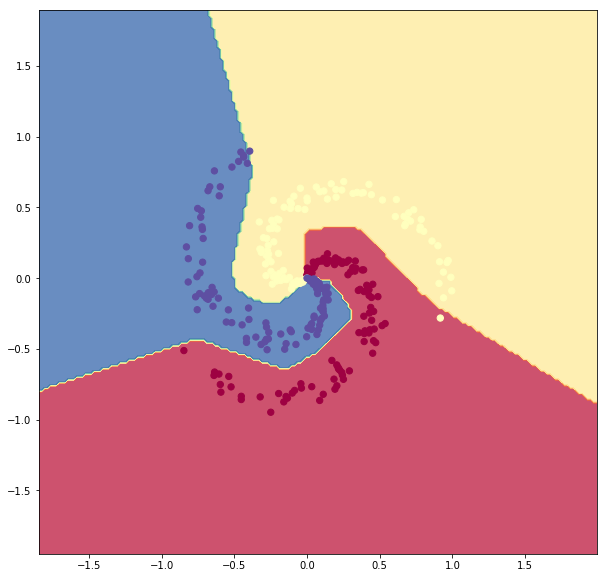

In [43]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())